# Assignment 5 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [338]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------

# ----------------- additional imports from sklrean: 
from sklearn.linear_model import LogisticRegression

# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [339]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [340]:
# word net installation:

# unmark if you want to use and need to install
!pip install wn
!python -m wn download omw-he:1.4


[notice] A new release of pip is available: 23.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip

Cached file found: C:\Users\Maor\.wn_data\downloads\7ecf10e89326bc0ac26ad94b40fe60a7b6ac3302

Checking C:\Users\Maor\AppData\Local\Temp\tmpofvdv4o_\omw-he\omw-he.xml
Skipping omw-he:1.4 (Hebrew Wordnet); already added



In [341]:
# word net import:

# unmark if you want to use:
#import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [342]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
#!pip install hebrew_tokenizer

In [343]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [344]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [345]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [346]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

# <u>Introduction</u>

This mini-project aims to develop a gender classification model based on the textual data of stories.<br>
The model will classify a given story into either male or female category based on the gender of the protagonist/writer.

The project follows five main steps:

1. **Tokenization**
2. **Prep-Evaluation**
3. **Evaluation**
4. **Evaluation Conclusion**
5. **Prediction**

**In the first step, Tokenization**,<br>
we will preprocess the textual data by splitting it into individual words.

**In the second step, the Prep-Evaluation** phase,<br>
we will define several key-functions that will be used during the evaluation phase.

**In the third step, the Evaluation** phase,<br>
we will train several models using different combinations of classifiers and vectorizers.<br>
We will then use <code>GridSearchCV</code> to tune the models and select the best hyperparameters.<br>
Finally, with the best hyperparameters, we will evaluate the models performance (<code>Average_f1</code>).

**In the fourth step, the Evaluation Conclusion**,<br>
we will analyze the results of our evaluations using <code>table and EDA representations</code>.

**In the fifth and final step, Prediction**,<br>
we will find the best-performing model based on their <code>Average_f1</code> value.
We will then use the best-performing model to predict the gender of a new story.<br>
Finally, we will preprocess the story using the same tokenization technique used in the evaluation phase and pass it to the model to get its predicted gender.

# <u>Step 1: Tokenization</u>

This is the first stage of our mini-project. Our goal is to preprocess each story in the corpus.<br/>
We are going to divide each story into tokens, consisting of only one Hebrew word,<br>
with each word/token separated from the other by a single whitespace.<br/>

<u><b>For Example:</b></u>
* ב.ע.מ. -> בעמ
* דוא"ל -> דואל
* שלום, עולם. -> שלום עולם

## Step 1.1: Define Preprocessing Function

<u>function name</u>: <b>preprocess_text</b><br/>

------------

<u><b>input parameters</b></u>:
- hebrew_text - a text/story written in <code>Hebrew</code>
------------
The function is going to return a regulated version of the <code>hebrew_text</code>,<br>
    that contains only Hebrew words, seperated by a single whitespace.
    
------------


In [347]:
def preprocess_text(hebrew_text):
    tokens = ht.tokenize(hebrew_text)
    return ' '.join([token[1] for token in tokens if (token[0] == 'HEBREW') and (len(token[1]) > 1)])

## Step 1.2: Apply The Preprocessing Function Onto <code>df_train and df_test</code>



In [348]:
df_train_tokenized = df_train.copy()
df_train_tokenized['story'] = df_train_tokenized['story'].apply(preprocess_text)

# <u>Step 2: Prep-Evaluation</u>

This phase is going to mostly consist of functions and variables definition<br>
which we will be used during the model Evaluation phase.

## Step 2.1: Define Vectorizer Parameters Functions

<u><b>The following vectorizer parameters functions are defined as:</b></u>

* CountVectorizer_params
* TfidfVectorizer_params

------------

<u><b>Input:</b></u>

* None

------------

<u><b>Output:</b></u>

* a dictionary of hyperparameters for the respective vectorizer

------------
<u><b>Description:</b></u>

These functions return dictionaries of hyperparameters for two different vectorizers:

* CountVectorizer 
* TfidfVectorizer 

which will be used in machine learning pipelines for text classification alongside various various machine learning classifier.
    
------------

In [349]:
def CountVectorizer_params() -> dict[str, list]:
    return {
        'vec': [CountVectorizer()],
        'vec__max_features': [10_000, 30_000, 40_000],
        'vec__ngram_range': [(1,1), (1,2)],
        'vec__min_df': [1, 3],
        'vec__max_df': [0.7, 0.9]
    }

def TfidfVectorizer_params() -> dict[str, list]:
    return {
        'vec': [TfidfVectorizer()],
        'vec__max_features': [10_000, 30_000, 40_000],
        'vec__ngram_range': [(1,1), (1,2)],
        'vec__min_df': [1, 3],
        'vec__max_df': [0.7, 0.9],
        'vec__sublinear_tf': [True]
    }


## Step 2.2: Define Classifier Parameters Functions
<u><b>The following classifier parameters functions are defined as:</b></u>

* MultinomialNB_params
* LinearSVC_params
* SGDClassifier_params
* Perceptron_params
* LogisticRegression_params
* DecisionTree_params
* KNN_params

------------

<u><b>Input:</b></u>

* None

------------

<u><b>Output:</b></u>

a dictionary of hyperparameters for the respective classifier

------------

<u><b>Description:</b></u>

These functions return dictionaries of hyperparameters for different classifiers:

* Multinomial Naive Bayes
* Linear Support Vector Classification
* Stochastic Gradient Descent Classification
* Perceptron
* Logistic Regression
* Decision Tree
* K-Nearest Neighbors

which will be used in machine learning pipelines for text classification alongside various vectorizers.

------------

In [350]:
def MultinomialNB_params() -> dict[str, list]:
    return {
        'clf': [MultinomialNB()],
        'clf__alpha': [0.1, 0.5, 1, 10]
    }

def LinearSVC_params() -> dict[str, list]:
    return {
        'clf': [LinearSVC()],
        'clf__C': [0.1, 0.5, 1],
        'clf__penalty': ['l2'],
        'clf__loss': ['squared_hinge']
    }

def SGDClassifier_params() -> dict[str, list]:
    return {
        'clf': [SGDClassifier()],
        'clf__alpha': [0.001, 0.05, 0.1],
        'clf__loss': ['hinge', 'squared_hinge']
    }

def Perceptron_params() -> dict[str, list]:
    return {
        'clf': [Perceptron()],
        'clf__alpha': [0.001, 0.05, 0.1],
        'clf__penalty': [None, 'l2', 'l1', 'elasticnet']
    }

def LogisticRegression_params() -> dict[str, list]:
    return {
        'clf': [LogisticRegression()],
        'clf__C': [0.01, 0.1, 1],
        'clf__max_iter': [100, 500, 1000]
    }

def DecisionTree_params() -> dict[str, list]:
    return {
        'clf': [DecisionTreeClassifier()],
        'clf__max_depth': [3, 5, 7],
        'clf__criterion': ['gini', 'entropy']
    }

def KNN_params() -> dict[str, list]:
    return {
        'clf': [KNeighborsClassifier()],
        'clf__n_neighbors': [3, 5, 7],
        'clf__weights': ['uniform', 'distance'],
        'clf__metric': ['cosine', 'euclidean']
    }

## Step 2.3: Define Vectorizers and Classifiers Reference Dictionaries
<u><b>The following reference dictionaries functions for vectorizers and classifiers are defined as:</b></u>

* vectorizers_ref_dict
* classifiers_ref_dict

------------

<u><b>Input:</b></u>

* None

------------

<u><b>Output:</b></u>

* A dictionary of dictionaries containing the respective vectorizer & classifier object and their hyperparameters

------------

<u><b>Description:</b></u>

These two functions create two dictionaries that are defined to store the respective vectorizer & classifier:

* object
* hyperparameters

These dictionaries will be used to create machine learning pipelines with various machine learning classifiers.

vectorizers_ref_dict stores the following vectorizers:

* CountVectorizer
* TfidfVectorizer

classifier_ref_dict stores the following machine learning algorithms/models:

* MultinomialNB
* LinearSVC
* SGDClassifier
* Perceptron
* LogisticRegression
* DecisionTree
* KNN

Both the dictionaries contain a dictionary for each vectorizer/model with two keys:

* object: stores the object of the respective vectorizer/model
* params: stores the dictionary of hyperparameters for the respective vectorizer/model

------------

In [351]:
def vectorizers_ref_dict() -> dict[str, dict[str, object]]:
    return {
        'CountVectorizer': {'object': CountVectorizer(), 'params': CountVectorizer_params()},
        'TfidfVectorizer': {'object': TfidfVectorizer(), 'params': TfidfVectorizer_params()}
    }

def classifiers_ref_dict() -> dict[str, dict[str, object]]:
    return {
        'MultinomialNB': {'object': MultinomialNB(), 'params': MultinomialNB_params()},
        'LinearSVC': {'object': LinearSVC(), 'params': LinearSVC_params()},
        'SGD': {'object': SGDClassifier(), 'params': SGDClassifier_params()},
        'Perceptron': {'object': Perceptron(), 'params': Perceptron_params()},
        'LogisticRegression': {'object': LogisticRegression(), 'params': LogisticRegression_params()},
        'DecisionTree': {'object': DecisionTreeClassifier(), 'params': DecisionTree_params()},
        'KNN': {'object': KNeighborsClassifier(), 'params': KNN_params()}
    }

## Step 2.4: Define Function to Create Machine Learning Pipelines

<u><b>The following function is defined as:</b></u>

* create_classifier_vectorizer_pipeline

------------

<u><b>Input:</b></u>

* <b>classifier_object</b>: object of the machine learning model
* <b>vectorizer_object</b>: object of the text vectorizer

------------

<u><b>Output:</b></u>

* A pipeline object

------------

<u><b>Description:</b></u>

The function creates a pipeline object with two components:

* Vectorizer: The text vectorizer object
* Classifier: The machine learning classifier object

The function takes two objects as input:

* the machine learning classifier object 
* text vectorizer object

It returns a pipeline object with two components: 

* the vectorizer 
* the classifier

The pipeline object will be used to fit the training data and make predictions on the test data.

------------

In [352]:
def create_classifier_vectorizer_pipeline(classifier_object: object, vectorizer_object: object) -> Pipeline:
    return Pipeline([('vec', vectorizer_object), ('clf', classifier_object)])

## Step 2.5: Define Function to Create Parameter Grid

<u><b>The following function is defined as:</b></u>

* create_param_grid

------------

<u><b>Input:</b></u>

* <b>classifier_params</b>: A dictionary containing the hyperparameter values for the machine learning classifier
* <b>vectorizer_params</b>: A dictionary containing the hyperparameter values for the text vectorizer

------------

<u><b>Output:</b></u>

* A dictionary of hyperparameters wrapped in a list

------------

<u><b>Description:</b></u>

The function creates a list of dictionaries, where each dictionary contains hyperparameters for the text vectorizer and the machine learning classifier.

The function takes two dictionaries as input:

* <b>classifier_params</b>: A dictionary containing the hyperparameter values for the machine learning model
* <b>vectorizer_params</b>: A dictionary containing the hyperparameter values for the text vectorizer

It returns a dictionary of the hyperparameter values for the text vectorizer and the machine learning classifier wrapped in a list.

This list of dictionaries is used to perform a grid search to find the best combination of hyperparameters for the given machine learning classifier and text vectorizer.

------------

In [353]:
def create_param_grid(classifier_params: dict[str, list], vectorizer_params: dict[str, list]) -> list[dict[str, list]]:
    return [dict(vectorizer_params, **classifier_params)] # ≡ [classifier_params ∪ vectorizer_params]

## Step 2.6: Define Function to Find Best Parameters

<u><b>The following function is defined as:</b></u>

* find_best_params

------------

<u><b>Input:</b></u>

* <b>pipeline_grid</b>: A pipeline object containing both the vectorizer and classifier
* <b>param_grid</b>: A list of dictionaries containing hyperparameters for the text vectorizer and machine learning classifier
* <b>df_train_tokenized</b>: A pandas dataframe representing our training set.

------------

<u><b>Output:</b></u>

* A dictionary containing the best hyperparameters for the vectorizer and classifier

------------

<u><b>Description:</b></u>

The function performs a grid search over a list of hyperparameters for both the text vectorizer and the machine learning classifier.


The function then uses the <code>GridSearchCV</code> function from scikit-learn to search over the parameter grid,<br>
using cross-validation (<code>cv = 5</code>) to evaluate each combination of hyperparameters.

Finaly, the function returns a dictionary containing the best hyperparameters for the text vectorizer and machine learning classifier,<br>
as determined by the grid search.

------------

In [354]:
def find_best_params(pipeline_grid: Pipeline, param_grid: list[dict[str, list]], df_train_tokenized: pd.DataFrame) -> dict:
    grid_search = GridSearchCV(
        estimator=pipeline_grid, 
        param_grid=param_grid,
        scoring='f1_macro',
        cv=5,
        n_jobs=-1,
        return_train_score=False
    )   
    grid_search.fit(df_train_tokenized['story'], df_train_tokenized['gender'])
    best_params = grid_search.best_params_
    return {
        'vec': best_params['vec'],
        'clf': best_params['clf']
    }

## Step 2.7: Define Function to Evaluate the Model

<u><b>The following function is defined as:</b></u>

* evaluate_model

------------

<u><b>Input:</b></u>

* <b>best_params</b>: A dictionary containing the best hyperparameters for the text vectorizer and machine learning classifier
* <b>df_train_tokenized</b>: A pandas dataframe representing our training set.

------------

<u><b>Output:</b></u>

* A float that represents the <code>Average_f1</code>.

------------

<u><b>Description:</b></u>

The function evaluates the performance of the machine learning model using the best hyperparameters obtained from the grid search that was performed<br>
in the <code>find_best_params</code> function.

The function does the following:

* It creates a pipeline object using the best hyperparameters for the text vectorizer and machine learning classifier.
* It fits the pipeline object on the training data.
* It calculates the f1 macro score for males and females separately using cross validtion on <code>df_train_tokenized['is_male']</code> and <code>df_train_tokenized['is_female']</code>.
* It calculates the average f1 score by taking the mean of the f1 macro scores for males and females.

At the end, the function returns a float that represents the <code>Average_f1</code>.

------------

In [355]:
def evaluate_model(best_params: dict, df_train_tokenized: pd.DataFrame) -> float:
    # fit
    pipeline_train = Pipeline(list(zip(best_params.keys(), best_params.values())))
    pipeline_train.fit(df_train_tokenized['story'], df_train_tokenized['gender'])
    
    # evaluation of f1_male and f1_female scores & Average_f1
    f1_macro_male = cross_val_score(pipeline_train, df_train_tokenized['story'], df_train_tokenized['is_male'], scoring='f1_macro', cv=5, n_jobs=-1).mean()
    f1_macro_female = cross_val_score(pipeline_train, df_train_tokenized['story'], df_train_tokenized['is_female'], scoring='f1_macro', cv=5, n_jobs=-1).mean()
    average_f1 = (f1_macro_male + f1_macro_female) / 2

    return average_f1

## Step 2.8: Define a Single Model Training --> Tuning --> Evaluation Flow

<u><b>The following function is defined as:</b></u>

* model_evaluation_flow

------------

<u><b>Input:</b></u>

* <b>clf_name</b>: A string name of the model's classifier.
* <b>classifiers</b>: The dictionary returned from <classifiers_ref_dict> function.
* <b>vectorizers</b>: The dictionary returned from <vectorizers_ref_dict> function.
* <b>results_ref</b>: The dictionary returned from <models_result> function.
* <b>df_train_tokenized</b>: A pandas dataframe representing our training set.


------------

<u><b>Output:</b></u>

* None

------------

<u><b>Description:</b></u>

The function perform the evaluation flow using most the functions defined in <code>Step 2</code>.

The function:

1. Creates a pipeline with the classifier and vectorizer specified 
2. Creates a parameter grid to tune the pipeline's hyperparameters
3. Finds the best hyperparameters using grid search with cross-validation on the training data
4. Evaluates the model on the training and testing data
5. Prints out the f1 scores for males, females, and the average f1 score
6. Saves the results to the results reference dictionary **(by reference)**

The function performs the above using most of functions that are defined in <code>Step 2</code>.

------------

In [356]:
def model_evaluation_flow(clf_name: str, classifiers: dict[dict[str, list]], vectorizers: dict[dict[str, list]], results_ref: dict, df_train_tokenized: pd.DataFrame):
    for vec_name in vectorizers.keys():
        print("-----------------------------------------------")
        print(f'({clf_name}, {vec_name}) -> Started\n')

        pipeline_grid = create_classifier_vectorizer_pipeline(classifiers[clf_name]['object'], vectorizers[vec_name]['object'])
        param_grid = create_param_grid(classifiers[clf_name]['params'], vectorizers[vec_name]['params'])
            
        best_params = find_best_params(pipeline_grid, param_grid, df_train_tokenized)

        average_f1 = evaluate_model(best_params, df_train_tokenized)
        print('Average_f1: ', round(average_f1, 3), '\n')

        results_ref['Classifier'].append(clf_name)
        results_ref['Vectorizer'].append(vec_name)
        results_ref['Classifier Best Parameters'].append(best_params['clf'])
        results_ref['Vectorizer Best Parameters'].append(best_params['vec'])
        results_ref['Average_f1'].append(average_f1)

        print(f'({clf_name}, {vec_name}) -> Finished')
        print("-----------------------------------------------\n\n")

## Step 2.9: Define Function to Save The Results of Each Model

<u><b>The following function is defined as:</b></u>

* models_result_dict

------------

<u><b>Input:</b></u>

* None

------------

<u><b>Output:</b></u>

* A dictionary containing empty lists for the following keys: 
    * 'Classifier'
    * 'Vectorizer'
    * 'Classifier Best Parameters'
    * 'Vectorizer Best Parameters'
    * 'f1_male score'
    * 'f1_female score'
    * 'Average_f1'

------------

<u><b>Description:</b></u>

The function creates an empty dictionary of empty lists, which will be used to store the results<br>
of each model that will be tested throughout the training phase.

(<code>model</code> ≡ combination of <code>vectorizer</code> and <code>machine learning classifier</code>)

------------

In [357]:
def models_result_dict() -> dict[str, list]:
    return {
        'Classifier': [],
        'Vectorizer': [],
        'Classifier Best Parameters': [],
        'Vectorizer Best Parameters': [],
        'Average_f1': []
    }

# <u>Step 3: Evaluation</u>

In this phase, we will train our machine learning models on the preprocessed data to classify the stories into male or female categories.<br>

We will make considerable use of the functions we defined in <code>Step 2</code>.

The goal of this step is to find for each combination of vectorizer and classifier (each combination is considered a model), the best hyperparameters,<br>
and with the best hyperparameters to estimate the model (calculate and display the f1 score for male and female and their average).

At the end of this phase, we will have trained <code>14 machine learning models</code>, and evaluated their performance.<br>
We will record the results of each model in a dictionary that we defined in <code>Step 2.9</code>.<br>
This dictionary will contain all the relevant attributes for examining the results and presenting them in differents way in <code>Step 4</code>,<br>
in order to find the best vectorizer and classifier for the prediction phase.

<u>**Important Notes:**</u>

1. The <code>run time</code> should be between **20-40 minutes**
2. Because the <code>run time</code> of the grid search is long, instead of performing it in one code section,<br>
I decided to divide it into 7 different code sections for each classifier & two different vectorizers.
    - This was done because running a single code section for 20-40 minutes might end up getting terminated midway,<br>
    which will force the runner to run the code all over again.

## Step 3.1: Preparations

### Step 3.1.1: Add Binary <code>is_male column</code> and <code>is_female column</code> to <code>df_train_tokenized</code>

In [358]:
df_train_tokenized['is_male'] = df_train_tokenized['gender'].apply(lambda gender: 1 if gender=='m' else 0)
df_train_tokenized['is_female'] = df_train_tokenized['gender'].apply(lambda gender: 1 if gender=='f' else 0)

### Step 3.1.2: Initialize Key-Important Variables

In [359]:
# dictionaries
classifiers = classifiers_ref_dict()
vectorizers = vectorizers_ref_dict()
models_result = models_result_dict()

# list of classifiers names:
classifiers_names = list(classifiers.keys())

# an indicator
clf_no = 0

## Step 3.2: Start Evaluating

### Step 3.2.1: Evaluate <code>MultinomialNB</code> Models

In [360]:
clf_name = classifiers_names[clf_no]
model_evaluation_flow(clf_name, classifiers, vectorizers, models_result, df_train_tokenized)
clf_no += 1

-----------------------------------------------
(MultinomialNB, CountVectorizer) -> Started

Average_f1:  0.683 

(MultinomialNB, CountVectorizer) -> Finished
-----------------------------------------------


-----------------------------------------------
(MultinomialNB, TfidfVectorizer) -> Started

Average_f1:  0.518 

(MultinomialNB, TfidfVectorizer) -> Finished
-----------------------------------------------




### Step 3.2.2: Evaluate <code>LinearSVC</code> Models

In [361]:
clf_name = classifiers_names[clf_no]
model_evaluation_flow(clf_name, classifiers, vectorizers, models_result, df_train_tokenized)
clf_no = 2

-----------------------------------------------
(LinearSVC, CountVectorizer) -> Started

Average_f1:  0.705 

(LinearSVC, CountVectorizer) -> Finished
-----------------------------------------------


-----------------------------------------------
(LinearSVC, TfidfVectorizer) -> Started

Average_f1:  0.565 

(LinearSVC, TfidfVectorizer) -> Finished
-----------------------------------------------




### Step 3.2.3: Evaluate <code>SGDClassifier</code> Models

In [364]:
clf_name = classifiers_names[clf_no]
model_evaluation_flow(clf_name, classifiers, vectorizers, models_result, df_train_tokenized)
clf_no = 3

-----------------------------------------------
(SGD, CountVectorizer) -> Started

Average_f1:  0.687 

(SGD, CountVectorizer) -> Finished
-----------------------------------------------


-----------------------------------------------
(SGD, TfidfVectorizer) -> Started

Average_f1:  0.64 

(SGD, TfidfVectorizer) -> Finished
-----------------------------------------------




### Step 3.2.4: Evaluate <code>Perceptron</code> Models

In [368]:
clf_name = classifiers_names[clf_no]
model_evaluation_flow(clf_name, classifiers, vectorizers, models_result, df_train_tokenized)
clf_no = 4

-----------------------------------------------
(Perceptron, CountVectorizer) -> Started

Average_f1:  0.675 

(Perceptron, CountVectorizer) -> Finished
-----------------------------------------------


-----------------------------------------------
(Perceptron, TfidfVectorizer) -> Started

Average_f1:  0.696 

(Perceptron, TfidfVectorizer) -> Finished
-----------------------------------------------




### Step 3.2.5: Evaluate <code>LogisticRegression</code> Models

In [373]:
clf_name = classifiers_names[clf_no]
model_evaluation_flow(clf_name, classifiers, vectorizers, models_result, df_train_tokenized)
clf_no = 5

-----------------------------------------------
(LogisticRegression, CountVectorizer) -> Started

Average_f1:  0.679 

(LogisticRegression, CountVectorizer) -> Finished
-----------------------------------------------


-----------------------------------------------
(LogisticRegression, TfidfVectorizer) -> Started

Average_f1:  0.433 

(LogisticRegression, TfidfVectorizer) -> Finished
-----------------------------------------------




### Step 3.2.6: Evaluate <code>DecisionTree</code> Models

In [377]:
clf_name = classifiers_names[clf_no]
model_evaluation_flow(clf_name, classifiers, vectorizers, models_result, df_train_tokenized)
clf_no = 6

-----------------------------------------------
(DecisionTree, CountVectorizer) -> Started

Average_f1:  0.547 

(DecisionTree, CountVectorizer) -> Finished
-----------------------------------------------


-----------------------------------------------
(DecisionTree, TfidfVectorizer) -> Started

Average_f1:  0.597 

(DecisionTree, TfidfVectorizer) -> Finished
-----------------------------------------------




### Step 3.2.7: Evaluate <code>KNN</code> Models

In [381]:
clf_name = classifiers_names[clf_no]
model_evaluation_flow(clf_name, classifiers, vectorizers, models_result, df_train_tokenized)

-----------------------------------------------
(KNN, CountVectorizer) -> Started

Average_f1:  0.618 

(KNN, CountVectorizer) -> Finished
-----------------------------------------------


-----------------------------------------------
(KNN, TfidfVectorizer) -> Started

Average_f1:  0.644 

(KNN, TfidfVectorizer) -> Finished
-----------------------------------------------




# <u>Step 4: Evaluation Conclusion:</u>

At this stage we will examine the different results we received from the different models.<br>
The model & vectorizer with the highest <code>Average_f1</code> will be used on the <code>test dataframe</code> for prediction.

## Step 4.1: Table:

In [386]:
results_df = pd.DataFrame(models_result)

results_df

,Classifier,Vectorizer,Classifier Best Parameters,Vectorizer Best Parameters,Average_f1
0,MultinomialNB,CountVectorizer,MultinomialNB(alpha=0.1),"CountVectorizer(max_df=0.9, max_features=30000...",0.683
1,MultinomialNB,TfidfVectorizer,MultinomialNB(alpha=0.1),"TfidfVectorizer(max_df=0.9, max_features=30000...",0.518
2,LinearSVC,CountVectorizer,LinearSVC(C=1),"CountVectorizer(max_df=0.9, max_features=30000...",0.705
3,LinearSVC,TfidfVectorizer,LinearSVC(C=1),"TfidfVectorizer(max_df=0.9, max_features=30000...",0.565
4,SGD,CountVectorizer,SGDClassifier(alpha=0.001),"CountVectorizer(max_df=0.9, max_features=30000...",0.687
5,SGD,TfidfVectorizer,SGDClassifier(alpha=0.001),"TfidfVectorizer(max_df=0.9, max_features=30000...",0.640
6,Perceptron,CountVectorizer,Perceptron(alpha=0.001),"CountVectorizer(max_df=0.9, max_features=30000...",0.675
7,Perceptron,TfidfVectorizer,Perceptron(alpha=0.001),"TfidfVectorizer(max_df=0.9, max_features=30000...",0.696
8,LogisticRegression,CountVectorizer,LogisticRegression(C=0.01),"CountVectorizer(max_df=0.9, max_features=30000...",0.679
9,LogisticRegression,TfidfVectorizer,LogisticRegression(C=0.01),"TfidfVectorizer(max_df=0.9, max_features=30000...",0.433


## Step 4.2: EDA:

Text(0.5, 1.0, 'Average_f1 for Text Classification Models')

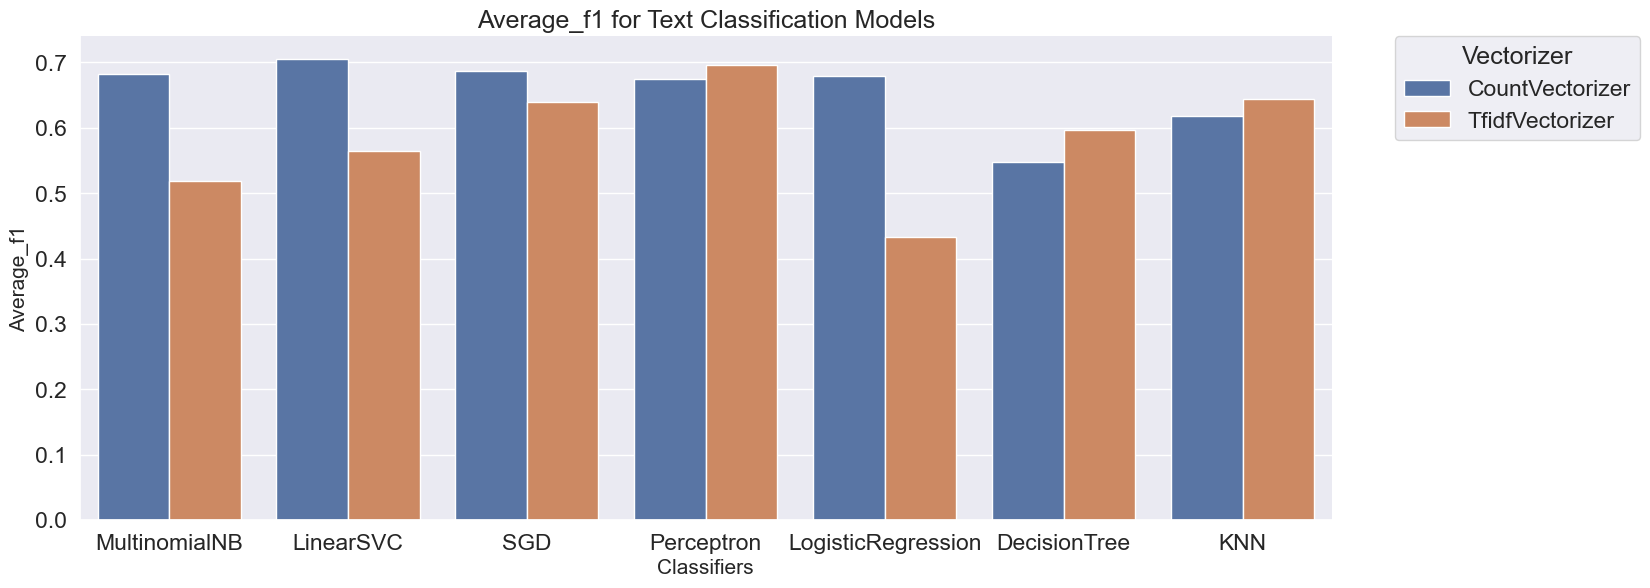

In [400]:
import seaborn as sns

# set the style for the plot
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# create the bar plot
best_results_bar = sns.catplot(
    x='Classifier', 
    y='Average_f1', 
    hue='Vectorizer', 
    data=results_df, 
    kind='bar', 
    legend=False, 
    palette='deep', 
    alpha=1, 
    height=6, 
    aspect=2.3
)

# set the labels for the plot
best_results_bar.set_xlabels("Classifiers", fontsize=15)
best_results_bar.set_ylabels("Average_f1", fontsize=15)

# set the title for the plot
plt.title('Average_f1 for Text Classification Models', fontsize=18)

# adjust the legend position
plt.legend(title="Vectorizer", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
        
# show the plot
plt.show()

# <u>Step 5: Prediction:</u>

In this phase we are going to take the model that produced the highest <code>Average_f1</code> value and use it to predict <code>df_test</code>.<br>
At the end of the predicition we'll display the first and last 5 rows of the predicted dataframe.

## Step 5.1: Tokenization

In [392]:
df_test_tokenized = df_test.copy()
df_test_tokenized['story'] = df_test_tokenized['story'].apply(preprocess_text)

## Step 5.2: Find The Model With The Highest <code>Average_f1</code>

In [394]:
best_model_series = results_df.loc[results_df['Average_f1'].idxmax()]

best_model_series

Classifier                                                            LinearSVC
Vectorizer                                                      CountVectorizer
Classifier Best Parameters                                       LinearSVC(C=1)
Vectorizer Best Parameters    CountVectorizer(max_df=0.9, max_features=30000...
Average_f1                                                                0.705
Name: 2, dtype: object

## Step 5.3: Create & Fit Model's <code>Pipeline</code>

In [396]:
pipeline_train = Pipeline([
    ('vectorizer', best_model_series['Vectorizer Best Parameters']),
    ('classifier', best_model_series['Classifier Best Parameters'])
])

pipeline_train.fit(df_train_tokenized['story'], df_train_tokenized['gender'])

Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_df=0.9, max_features=30000,
                                 ngram_range=(1, 2))),
                ('classifier', LinearSVC(C=1))])

## Step 5.3: It's Time To Predict!

In [397]:
prediction = pipeline_train.predict(df_test_tokenized['story'])

## Step 5.4: Display The First and Last 5 Rows

In [398]:
df_predicted = pd.DataFrame({
    'test_example_id': df_test_tokenized['test_example_id'],
    'predicted_gender': prediction
})

pd.concat([df_predicted.head(5), df_predicted.tail(5)])

,test_example_id,predicted_gender
0,0,m
1,1,m
2,2,m
3,3,m
4,4,m
318,318,m
319,319,m
320,320,m
321,321,m
322,322,m


### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [399]:
df_predicted.to_csv('classification_results.csv',index=False)